In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Python ile Makine Öğrenmesi/Ders - Pekiştirmeli Öğrenme (Reinforced Learning)'
!ls

Mounted at /content/drive
/content/drive/MyDrive/Python ile Makine Öğrenmesi/Ders - Pekiştirmeli Öğrenme (Reinforced Learning)
Ads_CTR_Optimisation.csv  Pekiştirmeli.ipynb


# **Random Selection**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1237
[4, 4, 1, 0, 8, 1, 0, 8, 9, 8, 8, 2, 5, 2, 9, 0, 6, 3, 3, 2, 7, 3, 3, 6, 2, 1, 2, 5, 9, 2, 0, 0, 7, 1, 0, 6, 8, 0, 4, 6, 4, 4, 5, 2, 1, 0, 0, 8, 1, 7, 6, 3, 0, 7, 6, 7, 0, 6, 7, 2, 9, 2, 3, 8, 5, 7, 1, 3, 1, 7, 8, 0, 2, 3, 1, 1, 6, 3, 2, 5, 2, 2, 6, 4, 6, 3, 6, 8, 4, 1, 0, 3, 2, 1, 7, 2, 9, 2, 0, 4, 8, 0, 4, 9, 9, 4, 2, 2, 0, 0, 2, 5, 4, 5, 4, 8, 0, 0, 0, 5, 7, 4, 7, 2, 8, 6, 2, 4, 8, 6, 1, 4, 0, 2, 2, 7, 6, 8, 0, 9, 7, 1, 8, 5, 7, 4, 9, 2, 0, 0, 8, 0, 7, 5, 1, 6, 1, 1, 7, 2, 2, 1, 1, 8, 3, 5, 9, 9, 0, 4, 8, 1, 8, 4, 4, 7, 6, 8, 3, 1, 3, 7, 8, 3, 0, 5, 9, 1, 2, 7, 1, 7, 7, 1, 7, 8, 5, 8, 5, 3, 9, 4, 7, 1, 6, 5, 8, 7, 9, 3, 0, 8, 7, 5, 0, 9, 5, 8, 7, 0, 7, 9, 4, 2, 8, 0, 4, 0, 3, 4, 4, 4, 4, 9, 1, 8, 6, 8, 0, 0, 9, 0, 9, 3, 5, 4, 4, 1, 2, 2, 1, 1, 6, 3, 9, 0, 7, 0, 0, 0, 5, 0, 0, 1, 4, 6, 1, 1, 5, 1, 8, 3, 5, 6, 2, 1, 7, 8, 1, 2, 7, 5, 6, 1, 8, 7, 2, 4, 2, 9, 7, 3, 4, 3, 8, 7, 6, 4, 5, 9, 9, 2, 7, 3, 4, 8, 4, 0, 2, 6, 6, 7, 9, 9, 9, 6, 5, 3, 7, 5, 5, 5, 9, 4, 5, 5, 1, 5, 1, 9, 6, 7

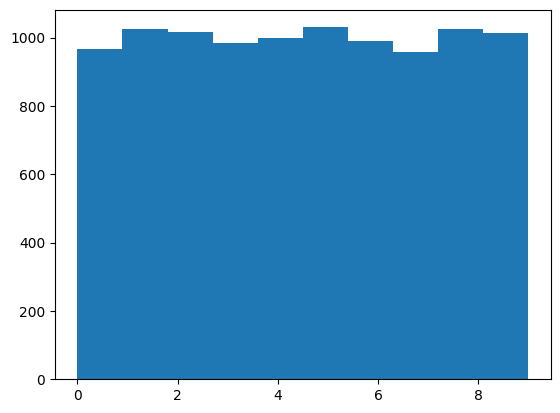

In [3]:
veriler = pd.read_csv('Ads_CTR_Optimisation.csv')

import random
N = 10000
d = 10
toplam = 0
secilenler = []
for n in range(0,N):
  ad = random.randrange(d)
  secilenler.append(ad)
  odul = veriler.values[n,ad]
  toplam = toplam + odul
print(toplam)
print(secilenler)

plt.hist(secilenler)
plt.show()

# **UCB**

2231


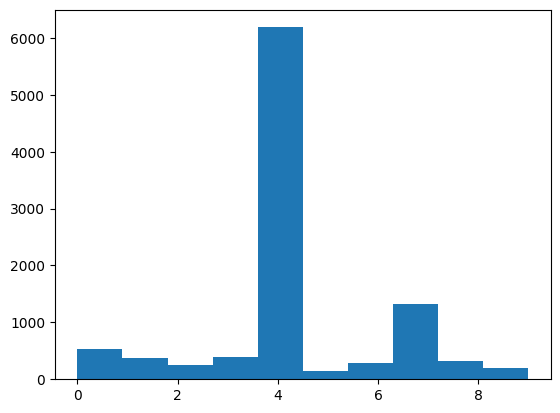

In [4]:
import math
N = 10000
d = 10
oduller = [0] * d # d (10) elemanlı dizi, ilk başta bütün ilanların ödülü 0
toplam = 0 # toplam ödül
tıklamalar = [0] * d # o ana kadarki tıklamalar
secilenler = []
for n in range(1, N):
  ad = 0 # seçilen ilan
  max_ucb = 0

  for i in range(0, d):
    if (tıklamalar[i] > 0):
      ortalama = oduller[i] / tıklamalar[i]
      delta = math.sqrt(3/2 * math.log(n) / tıklamalar[i])
      ucb = ortalama + delta
    else:
      ucb = N * 10
    if max_ucb < ucb:
      max_ucb = ucb
      ad = i

  secilenler.append(ad)
  tıklamalar[ad] = tıklamalar[ad] + 1
  odul = veriler.values[n,ad]
  oduller[ad] = oduller[ad] + odul
  toplam = toplam + odul
print(toplam)

plt.hist(secilenler)
plt.show()


# **Thompson**

2605


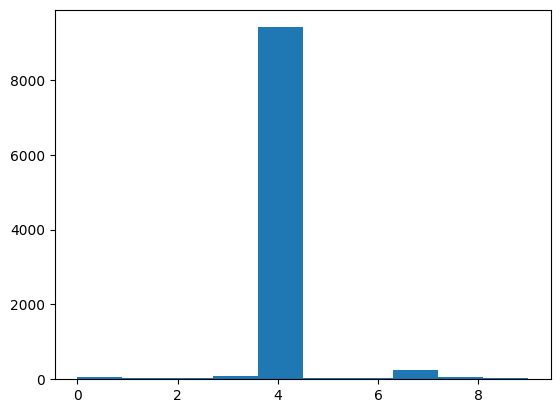

In [11]:
import random
N = 10000
d = 10
toplam = 0 # toplam ödül
secilenler = []
birler = [0] * d
sifirlar = [0] * d
for n in range(1, N):
  ad = 0 # seçilen ilan
  max_th = 0

  for i in range(0, d):
    rasbeta = random.betavariate(birler[i] + 1, sifirlar[i] + 1)
    if rasbeta > max_th:
      max_th  = rasbeta
      ad = i

  secilenler.append(ad)
  odul = veriler.values[n,ad]
  if odul == 1:
    birler[ad] = birler[ad] + 1
  else:
    sifirlar[ad] = sifirlar[ad] + 1
  toplam = toplam + odul
print(toplam)

plt.hist(secilenler)
plt.show()
